# Introducrtion to Machine Learning: Assignment #3
## Submission date: 09\07\2024, 23:55.
### Topics:
- Multiclass Classification
- PAC, VCdim
- Bias vs Variance
- Cross validation
- Linear Regression
- Decision Trees

Submitted by:

Aseel Shaheen 212393532 <br>
Elias Badaan  212804694


**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Multiclass SVM

You will implement and compare different multiclass methods in both separable and non separable cases.

In [11]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


As seen in tutorials, One vs One is usually a better choice than other methods, even SKlearn uses it! <br/>
You are given a partial implementation of OvO classifier and need to complete it. Specifically:<br/>
- ```__init__(self, n_classes=2, C=1.0)``` - Init $\binom{n}{2}$ estimators, one for each pair of classes.

- ```fit(self, X, y)``` - given data and labels learns the classifiers using linear SVM. <br/>

- ```predict(self, X)``` - as learned in lectures, prediction for sample will be the majority class got most votes from all the classifiers.  Therefore, $\forall i<j$ predict who is the winner for X in the estimator $(i,j)$ and update the bins accordinly.

In [13]:
from collections import defaultdict

class OneVsOneClassifier:
    def __init__(self, n_classes=2, C=1.0):
        # Add code here
        # we initilaize n choose 2 estimators for one each pair of classess
        self.n_classes = n_classes
        self.C = C
        # Initialize a dictionary to hold the binary classifiers for each class pair
        self.estimators = defaultdict(lambda: SVC(C=self.C, kernel='linear'))
        #! self.estimators = defaultdict(None)

    def fit(self, X, y):
        # Fit a binary classifier for each pair of classes
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                # Select data belonging to class i or j
                idx = np.where((y == i) | (y == j))
                temp_X, temp_y = X[idx], y[idx]
                # Adjust labels for the binary classifier: class i -> 0, class j -> 1
                temp_y = np.where(temp_y == i, 0, 1)
                # Train the classifier for this pair
                self.estimators[(i, j)].fit(temp_X, temp_y)


    def predict(self, X):
        # Initialize a matrix to count votes for each class
        votes = np.zeros((len(X), self.n_classes))
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                # Predict using the classifier for classes i and j
                preds = self.estimators[(i, j)].predict(X)
                # Increment vote count: preds == 0 -> class i, preds == 1 -> class j
                for k in range(len(preds)):
                    if preds[k] == 0:
                        votes[k, i] += 1
                    else:
                        votes[k, j] += 1
        # The predicted class is the one with the most votes
        return np.argmax(votes, axis=1)
    
       #! return np.argmax(scores, axis=0)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

The data

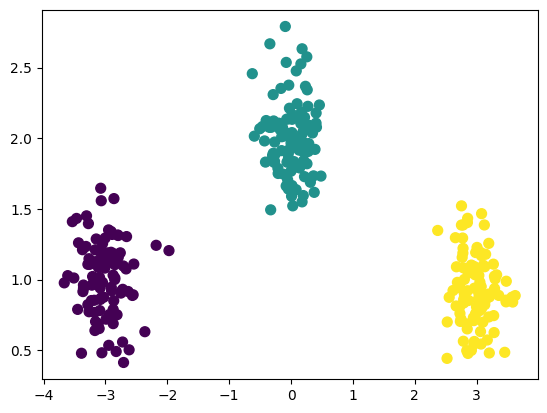

In [14]:
from sklearn.datasets import make_blobs

np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

This will test the classifier we just built by plotting confusion matrix and draw the decision boundaries. <br/>
Does the value of C matter? <br/>
<font color='red'>Write here your answer and explain<br>
As we learned in lectures and tutorial:<br>
The regularization parameter C  controls the trade-off between margin size and classification error such as when picking small C we allow more errors and when we pick bigger C we allow less errors as said in tutorial.<br>
so in our case here the value C does matter, and picking smaller C will lead to the classifer to find a larger margin potentaily to better generalization ,and a larger C minimize the classifaction error on training data which may lead to overfit.</font>

array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]], dtype=int64)

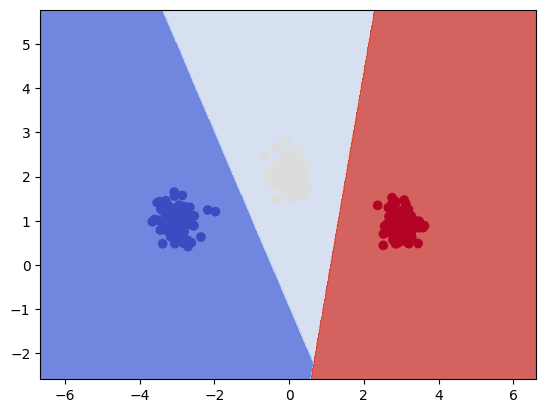

In [15]:
from sklearn import metrics


clf_onevsall = OneVsOneClassifier(n_classes=3, C=2)
clf_onevsall.fit(X,y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

metrics.confusion_matrix(y, clf_onevsall.predict(X))

Generate another data



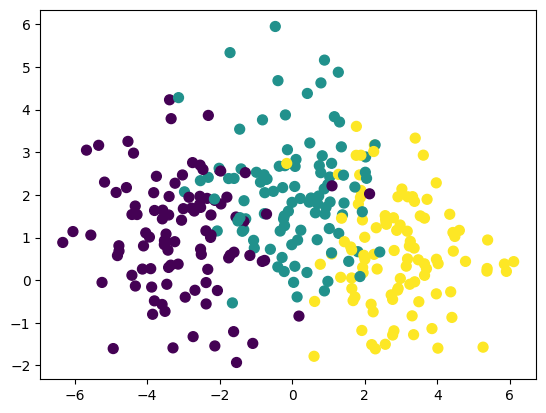

In [16]:
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=1.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

Look at the train vs test for different values of C. <br/> Justify the plot, by checking what happens as $C\rightarrow 0$, $C\rightarrow \infty$ and mid value C.<br/>
<font color='red'>Write here your answer and explain<br>
As said in tutorial, small C allows constraints to be easily igonred which lead to large margin and when C goes to 0 due to the size of the margin more training points will be missclasifed and will lead to underfitting and the model wont prefrom well.<br>
Large C on the other hand makes constraints hard to ignore which lead to narrow margins and when C is going to infinte it aims to classify all the points (hard svm) which may lead to the descion boundaries to fit the data very well which may lead to overfitting.<br>
In the middle values of C, the model will be able to find a good balance between the margin
</font>

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 108.67it/s]


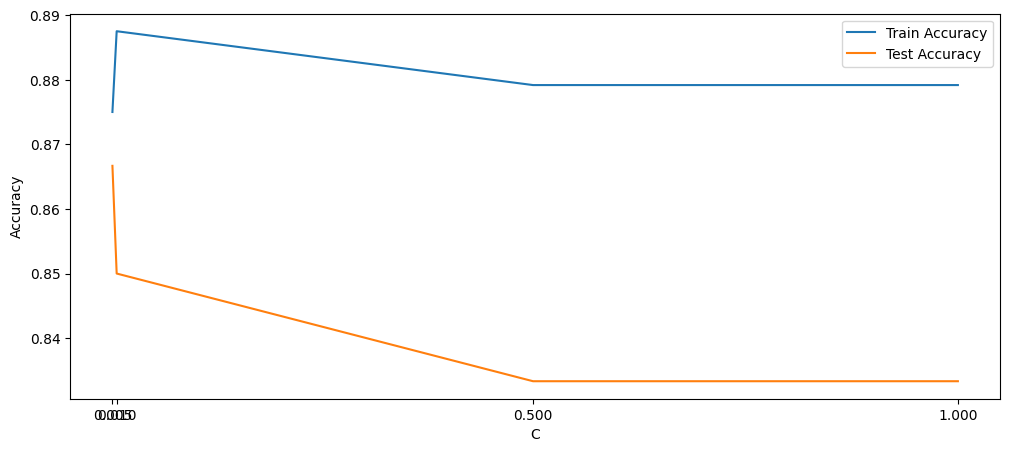

In [17]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of C values
C_values = [5e-3, 1e-2, 0.5, 1]

train_accuracies = []
test_accuracies = []

for C in tqdm(C_values):
    # Create a new OneVsOneClassifier instance
    clf_onevsall = OneVsOneClassifier(n_classes=3, C=C)

    # Fit the classifier on the training data
    clf_onevsall.fit(X_train, y_train)

    # Calculate the train and test accuracies
    train_accuracy = clf_onevsall.score(X_train, y_train)
    test_accuracy = clf_onevsall.score(X_test, y_test)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the train and test accuracies as a function of C

plt.figure(figsize=(12,5))
plt.plot(C_values, train_accuracies, label="Train Accuracy")
plt.plot(C_values, test_accuracies, label="Test Accuracy")
plt.xlabel("C")
plt.xticks(C_values)
plt.ylabel("Accuracy")
plt.legend()
plt.show()





Now, you will experience little bit from softmax. It uses neural networks, but you dont have to understand it. The importand part is the preidction, which is obtained by:
```
def forward(self, x):
        out = self.linear(x)
        return torch.softmax(out, dim=1)
```
Note that this is exactly that you saw - linear score $s_j$ and then applying softmax.

The best results are obtained using 300 epochs (iterations) and in each iteration the batch size is the entire data. <br/>
1. What happens as you use 100,600 epcohs compared to 300? why is that?
2. Use 300 epochs with batch size 50 vs the entire data. How does the batch size affect the convergence of the problem?

<font color='red'>Write here your answers and explain them<br><br>
1.when puttin num_epochs=600 we got accuarcy=0.7833<br>
when puttin num_epochs=300 we got accuarcy=0.8<br>
when puttin num_epochs=100 we got accuarcy=0.8167<br>
so we can conculde that when we run 100 epchos the model is able to converge a good solution and when we increase the number of epochs the model start to overfit the training data (or doesnt neccesarly improve since 300 is the best) and when we go on 600 epcohs the overfitting increase and the model starts to learn noises also which lead to wrose accuarcy. <br><br>
2.using 300 epochs and setting the bash size to 50 has given us the accuarcy= 0.7833.<br>
Usaually when we use smaller batch size compared to the data may help the model to escape the local minimum which may lead to better solutions . and also smaller batches leads to the model to update its weights more frequently and also provide regulazation effect which helps prevent the overfitting. But small batches may also mean that the gradient estimates used to update the model's weights are less accurate. This can sometimes lead to convergence on suboptimal solutions, as in our case led to worse accuarcy.



</font>

In [18]:
num_epochs = 300
# batch_size = len(X_train) // 3
batch_size = 50

print(f"Training size is {X_train} samples and batch size is {batch_size}")

Training size is [[ 4.40560358e+00 -8.72299757e-01]
 [ 1.63979804e+00  5.26805585e-02]
 [-4.77652153e+00  8.08131005e-01]
 [ 3.47900558e+00  4.78757314e-01]
 [ 3.97435007e+00  2.28324744e+00]
 [-7.14227010e-01  2.36554008e+00]
 [ 1.81396237e+00  6.68840150e-01]
 [-4.09763487e+00  8.04457287e-01]
 [ 9.82682587e-01  2.24271087e+00]
 [ 3.24532862e+00 -9.48704625e-02]
 [-3.39188525e+00  1.96376467e+00]
 [ 9.34498677e-01  1.70887875e+00]
 [-5.24179448e+00 -5.21842071e-02]
 [-4.85308185e+00  2.05788986e+00]
 [ 1.28523112e+00  1.09765034e+00]
 [ 1.09968175e+00  2.21357665e+00]
 [ 3.37904304e+00 -3.73435559e-02]
 [ 1.97637600e+00  5.84200919e-01]
 [-3.40631204e+00  2.99706867e-01]
 [ 1.93536337e+00  1.60521495e+00]
 [ 2.80698755e+00 -1.18661100e+00]
 [ 1.56056287e+00  4.42841809e-01]
 [-1.54809814e+00  1.48259756e+00]
 [ 1.64181481e+00  7.11353128e-01]
 [ 1.16485920e+00  3.83541517e+00]
 [-3.57750669e+00  1.43861062e+00]
 [ 8.26580210e-02  2.66944794e+00]
 [ 3.64865616e+00  3.83756361e-01]
 [-

In [20]:
#@title This will train the model using softmax

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define the simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(input_size, output_size)
        self.linear1.weight.data.fill_(1)
        self.linear1.bias.data.fill_(1)

    def forward(self, x):
        out = self.linear1(x)
        return torch.softmax(out, dim=1)

# Set hyperparameters
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))
lr = 0.01

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Instantiate the model and define the optimizer
model = SimpleNN(input_size, output_size)
optimizer = optim.SGD(model.parameters(), lr)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    #if (epoch + 1) % 10 == 0:
    #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.7833


array([[94,  4,  2],
       [15, 73, 12],
       [ 0, 10, 90]], dtype=int64)

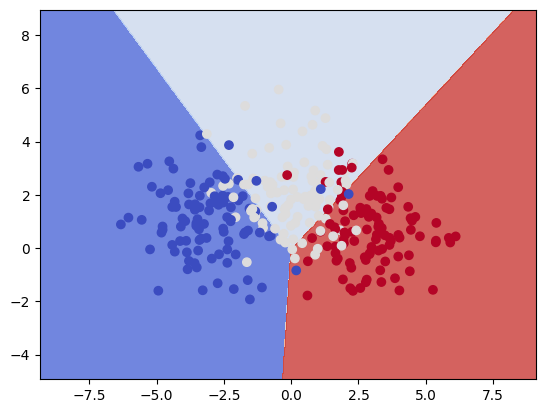

In [21]:
#@title This will plot the boundaries of the model

def predict(data):
    outputs = model(torch.tensor(data, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    return predicted

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

metrics.confusion_matrix(y, predict(X))

## Question 2 - Linear Regression
You are requested by the Charles Darvin himself to predict the age of abalone from physical measurements.
The dataset consists of 7 continious features that he has collected for you.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

C:\Users\User\AppData\Local\Temp\ipykernel_10312\2366189172.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>
Don't use pinv

In [2]:

def Linreg_sol(X, y):
    # Step 1: Add a column of ones to X for the intercept term
    X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Step 2: Compute the transpose of X
    X_transpose = X_with_intercept.T
    
    # Step 3: Compute the product of X_transpose and X
    X_transpose_X = X_transpose.dot(X_with_intercept)
    
    # Step 4: Compute the inverse of X_transpose_X
    inverse_X_transpose_X = np.linalg.inv(X_transpose_X)
    
    # Step 5: Compute the product of X_transpose and y
    X_transpose_y = X_transpose.dot(y)
    
    # Step 6: Compute the product of the inverse of X_transpose_X and X_transpose_y
    coeff = inverse_X_transpose_X.dot(X_transpose_y)
    
    # Step 7: Return theta
    return coeff

Load data from https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv

In [3]:
# URL of the dataset
url = "https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url, header=None)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(df.head())

       0      1      2       3       4       5      6   7
0  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


Your tasks are:
- Convert to numpy
- Preproccess the data
- Find the weight vector and the bias

In [4]:
from sklearn.preprocessing import StandardScaler

# Convert to numpy
data = df.to_numpy()

X = data[:, :-1]  # All rows, all columns except the last
y = data[:, -1]   # All rows, last column

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Proceed with linear regression using the scaled features
w = Linreg_sol(X_scaled, y)

# Suppose w is the solution
print(f'The linear line is {w[1]:.2f}x1+{w[2]:.2f}x2+{w[3]:.2f}x3+{w[4]:.2f}x4+{w[5]:.2f}x5+{w[6]:.2f}x6+{w[7]:.2f}x7+{w[0]:.2f}=0')

The linear line is -0.19x1+1.33x2+0.49x3+4.53x4+-4.49x5+-1.08x6+1.19x7+9.93=0


Now, implement 'Linreg_sol_via_GD' which implement gradient descent on the linear regression problem. The stopping criterion should be based only by the iterations number recived as parameter

In [5]:
def Linreg_sol_via_GD(X, y, lr, iter_number):
    w = np.ones(X.shape[1])
    m, n = X.shape  # m is the number of examples, n is the number of features

    for _ in range(iter_number):
        gradient = (1/m) * X.T.dot(X.dot(w) - y)  # Compute the gradient
        w = w - lr * gradient  # Update w by subtracting the product of lr and gradient

    return w

The following code measures the number of iterations as a function of the error gap between the returned weights and the correct solution. <br/>
Conclude the complexity formula required - How many iterations do we need as a function of the error, $\varepsilon$? Make sure to include the $𝚶$ notation in your answer. <br/>
Note: This error is sometimes called 'gap'. <br/>
<font color='red'>Write your answer here and explain it<br><br>
Before we conclude the formula we can see that the gap decrease as the number of iterations increases, and thats due to the gradient descent an optimization algorithm that mimnimize the error function iteratively.<br><br>
Now to To find the number of iterations k needed to to achieve an error less than a spefiefed ε we define the inequality:<br>
ε0⋅βk≤ε we extract k as follows:<br>

βk≤ε/ε0 <br>
k⋅log(β)≤log(ε/ε0)<br>
k≥log(ε/ε0)/log(1/β)   and thats due to log(β)<0 (β<1) <br>
<br>so The number of iterations k needed to achieve an error less than ε is proportional to the logarithm of the inverse of ε:<br>
k=O(log(1/ε))

</font>

100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


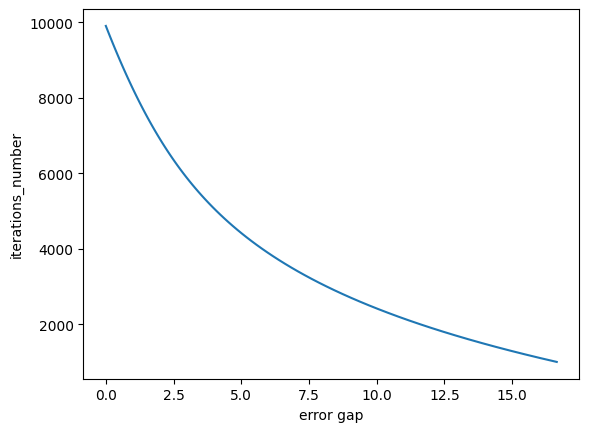

In [7]:
w_real = w
X_scaled = np.hstack([np.ones((X.shape[0], 1)), X])

iters = np.arange(1000, 10_000, 100)
gaps = []

for iter in tqdm(iters):
    w = Linreg_sol_via_GD(X_scaled, y, lr=0.1, iter_number=iter)
    gaps.append(np.linalg.norm(w_real - w))

plt.plot(gaps, iters)
plt.ylabel("iterations_number")
plt.xlabel("error gap")
plt.show()

In the second part of the task, we will see the features dependence and try to solve it.

Calculate the the value of $\text{Cov}(X)=\frac{1}{n-1}(X-\mu)^\top (X-\mu)$? <br/>
- What can you imply from this about the features?
- Can we imply something on $X^\top X$? Must its det be 0?

Note: In your calculations, make sure the bias is not included as feature. <br/>
<font color='red'>Write your answers here and explain it<br><br>
As we see from the Covarince matrix, the diagonal axis is close to 1 almost, and thats due to the scaling been done to the data to have mean 0 and variance close to 1.<br>
the Off diagonal elements represents the covariance bettween the features, values close to 1 such as 0.98704956 between the first and second features, indicate a strong positive linear relationship, which means when one feature increase the other tend to increase as well.<br><br>
The determinant of the matrix XTX is (4.113594836382305e+18) which is a very large postive number, implies that the matrix is invertible and that the features are lineary independet. but despite the strong correlations among features no feature is perfect linear combinations of the others<br>

A non-zero determinant of XTX implies that X has full rank, meaning all features of X are linearly independent. This contradicts the notion that its determinant must be 0 for linear dependency. Therefore, we can imply that the features, despite being correlated, do not perfectly linearly depend on each other, allowing X⊤X to be invertible.

</font>

In [8]:
def calculate_covariance_matrix(X):
    n_samples = X.shape[0]
    mean_vector = np.mean(X, axis=0)
    X_centered = X - mean_vector
    covariance_matrix = (X_centered.T @ X_centered) / (n_samples - 1)
    return covariance_matrix

cov_matrix = calculate_covariance_matrix(X_scaled)
print("Covariance Matrix:\n", cov_matrix)
# Calculate and print the determinant of the covariance matrix
XTX = np.dot(X_scaled.T, X_scaled)
det_XTX = np.linalg.det(XTX)
print("Determinant of the XTX Matrix:", det_XTX)


Covariance Matrix:
 [[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.01442231 0.01176082 0.00415691 0.05449071 0.02393495
  0.01188723 0.01500717]
 [0.         0.01176082 0.00984855 0.00346055 0.04503818 0.0196742
  0.0097873  0.01250664]
 [0.         0.00415691 0.00346055 0.0017495  0.01680347 0.00719489
  0.00366017 0.0047589 ]
 [0.         0.05449071 0.04503818 0.01680347 0.24048139 0.10551803
  0.05194616 0.06521587]
 [0.         0.02393495 0.0196742  0.00719489 0.10551803 0.04926755
  0.0226749  0.02727096]
 [0.         0.01188723 0.0097873  0.00366017 0.05194616 0.0226749
  0.01201528 0.01384956]
 [0.         0.01500717 0.01250664 0.0047589  0.06521587 0.02727096
  0.01384956 0.01937738]]
Determinant of the XTX Matrix: 11776407547.863958


Implement the solution to ridge regression using GD.

In [9]:

def Linreg_sol_Ridge(X, y, lamda):
    m, n = X.shape
    # Add a column of ones to X for the bias term
    X_bias = np.hstack([np.ones((m, 1)), X])
    # Create identity matrix of size (n+1) to include the bias term
    I = np.eye(n+1)
    # Set the first element to 0 to exclude the bias term from regularization
    I[0, 0] = 0
    # Compute the closed-form solution
    theta = np.linalg.inv(X_bias.T.dot(X_bias) + lamda * I).dot(X_bias.T).dot(y)
    return theta


The following code measures the mse error as function of the regularization hyperparameter lamda. <br/>Explain the origin to the mse' behaviour as function of lamda in this problem. <br/>
<font color='red'>Write your answer here and explain it
:<br><br>
The behavior of mse in relation to the regularization hyperparameter lambda in Ridge regression can be attributed to the balance between bias and variance, which lambda directly influences.<br>
For small values of lambda:the regularization effect is minimial,leading the model to behave similarly to ordinary least square regression, which can result in low bias but high variance which may cause to overfitting<br><br>
As lambda increases: the regularization term become more infleuntial penalizing large coefficents,this incrementally increases bias but significantly lowers variance, improving the model's generalization to new data<br><br>
And for very large lambda: the regulazation term becomes bigger,penalizing more the coeffeints and driving them to 0, which increase bias to a level where the model no longer captures data adequatly which lead to underfittng which increase the mse.</font>

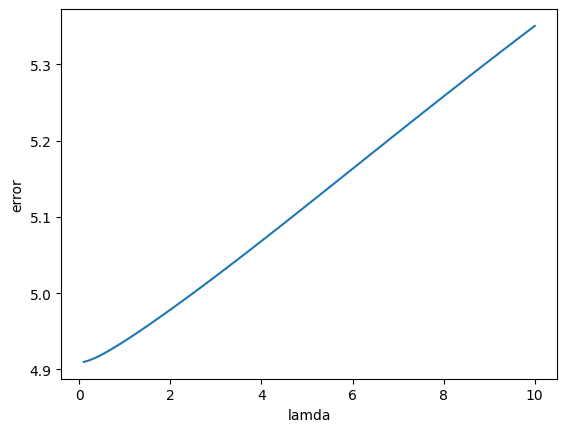

In [10]:
mses = []
lamdas = np.arange(0.1, 10.1, 0.1)
X_for_reg = X_scaled
X_for_reg_with_bias = np.hstack([np.ones((X_for_reg.shape[0], 1)), X_for_reg])

for lamda in lamdas:

    w = Linreg_sol_Ridge(X_for_reg, y, lamda)

    preds = np.dot(X_for_reg_with_bias, w)
    mses.append(np.mean((preds - y) ** 2))

plt.plot(lamdas, mses)
plt.ylabel("error")
plt.xlabel("lamda")
plt.show()

## Question 3 - Decision tree

Recall the wine dataset from hw1, where we classified wine types based on their physical and chemical properties. You will do it, but this time with decision trees!

In [1]:
# Import libraries

import numpy as np
import pandas as pd

C:\Users\User\AppData\Local\Temp\ipykernel_14952\3510253747.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the data, print the first rows

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv')
data.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


Complete this missing implementation of the following functions:
- ```calculate_entropy(self, data)``` – given data, compute the entropy, where the distribution is over its labels (target class).
- ```calculate_information_gain(self, data, feature)``` – given data and specific feature, compute the information gain given by selecting that feature.

Algorithm: The data is continuous, so create 10 thresholds between the min and max values of that feature. For each threshold, split to left tree and right tree and calculate the gain. Choose the threshold which gives the highest gain, along with the gain itself (to later compare between features) <br/>

Tip: To split the tree (represented by data df), use filter_data.
For example, when calculating the gain of 'skew' with threshold 0.5, you can create the left tree by use ```filter_data(data, 'skew', '0.5', left=True)``` to obtain only those samples.

In [9]:
# Define the ID3 decision tree class
class DecisionTree:
	def __init__(self, max_depth=np.inf):
		self.tree = {}
		self.max_depth = max_depth

  
	def calculate_entropy(self, data):
		labels = data.iloc[:, -1]  #extract labels
		label_counts = labels.value_counts()	#count the number of occurnces in each unique label 
		total_labels = len(labels)				# calculate the probabilty 
		probabilities = label_counts / total_labels
		entropy = -sum(probabilities * np.log2(probabilities))	# calculate the entropy according to the formula 
		return entropy

	def calculate_information_gain(self, data, feature):
		total_entropy = self.calculate_entropy(data)	#calculate the max entropy 
		feature_values = data[feature]	#extract feature values
		min_value, max_value = feature_values.min(), feature_values.max()
		thresholds = np.linspace(min_value, max_value, 11)[1:-1]  # Generate 10 thresholds, excluding the min and max values

		best_threshold = None
		best_gain = 0

		for threshold in thresholds:
			# Split the data to right and left according to the thresholds 
			left_data = self.filter_data(data, feature, threshold, left=True)
			right_data = self.filter_data(data, feature, threshold, left=False)

			# Calculate the weighted average of the entropy
			left_entropy = self.calculate_entropy(left_data)
			right_entropy = self.calculate_entropy(right_data)
			total_size = len(data)
			weighted_entropy = (len(left_data) / total_size) * left_entropy + (len(right_data) / total_size) * right_entropy

			# Calculate information gain according to the formula
			information_gain = total_entropy - weighted_entropy

			# Update the best threshold if this threshold gives a better gain
			if information_gain > best_gain:
				best_gain = information_gain
				best_threshold = threshold

		return best_gain, best_threshold

	def filter_data(self, data, feature, value, left=True):
		if left:
			return data[data[feature] <= value].drop(feature, axis=1)
		else:
			return data[data[feature] > value].drop(feature, axis=1)

	def create_tree(self, data, depth=0):
		if depth == self.max_depth:
			labels = data.iloc[:, -1]
			unique_labels, label_counts = np.unique(labels, return_counts=True)
			majority_label = unique_labels[label_counts.argmax()]
			return majority_label

     
		# Recursive function to create the decision tree
		labels = data.iloc[:, -1]

		# Base case: if all labels are the same, return the label
		if len(np.unique(labels)) == 1:
			return list(labels)[0]

		features = data.columns.tolist()[:-1]
		# Base case: if there are no features left to split on, return the majority label
		if len(features) == 0:
			unique_labels, label_counts = np.unique(labels, return_counts=True)
			majority_label = unique_labels[label_counts.argmax()]
			return majority_label

		selected_feature = None
		best_gain = 0
		best_treshold = None

		for feature in features:
			gain, treshold = self.calculate_information_gain(data, feature)
			if gain >= best_gain:
				selected_feature = feature
				best_treshold = treshold
				best_gain = gain

		# Create the tree node
		tree_node = {}
		tree_node[(selected_feature, f"<={best_treshold}")] = self.create_tree(self.filter_data(data, selected_feature, best_treshold, left=True), depth+1)
		tree_node[(selected_feature, f">{best_treshold}")] = self.create_tree(self.filter_data(data, selected_feature, best_treshold, left=False), depth+1)

		# check if can unite them.
		if not isinstance(tree_node[(selected_feature, f"<={best_treshold}")], dict) and \
				not isinstance(tree_node[(selected_feature, f">{best_treshold}")], dict):
			if tree_node[(selected_feature, f"<={best_treshold}")] == tree_node[(selected_feature, f">{best_treshold}")]:
				return tree_node[(selected_feature, f"<={best_treshold}")]

		return tree_node

	def fit(self, data):
		self.tree = self.create_tree(data)

	def fit2(self, X, y):
		data = X.copy()
		data['label'] = y
		self.tree = self.create_tree(data)
		
	def predict(self, X):
		X = [row[1] for row in X.iterrows()]

		# Predict the labels for new data points
		predictions = []

		for row in X:
			current_node = self.tree
			while isinstance(current_node, dict):
				split_condition = next(iter(current_node))
				feature, value = split_condition
				treshold = float(value[2:])
				if row[feature] <= treshold:
					current_node = current_node[feature, f"<={treshold}"]
				else:
					current_node = current_node[feature, f">{treshold}"]
			predictions.append(current_node)

		return predictions

	def _plot(self, tree, indent):
		depth = 1
		for key, value in tree.items():
			if isinstance(value, dict):
				print(" " * indent + str(key) + ":")
				depth = max(depth, 1 + self._plot(value, indent + 2))
			else:
				print(" " * indent + str(key) + ": " + str(value))
		return depth

	def plot(self):
		depth = self._plot(self.tree, 0)
		print(f'depth is {depth}')


You are ready - define DecisionTree, fit it on the entire data and plot the tree. <br/>
The depth of the tree should be 5

In [10]:
# Initialize the DecisionTree
decision_tree = DecisionTree()

# Fit the decision tree on the entire dataset
decision_tree.fit(data)

# Plot the tree
decision_tree.plot()

('Flavanoids', '<=1.7620000000000002'):
  ('Color intensity', '<=3.6240000000000006'): 2
  ('Color intensity', '>3.6240000000000006'):
    ('Alcalinity of ash', '<=17.1'): 2
    ('Alcalinity of ash', '>17.1'):
      ('OD280/OD315 of diluted wines', '<=1.9900000000000002'): 3
      ('OD280/OD315 of diluted wines', '>1.9900000000000002'):
        ('Proanthocyanins', '<=1.1920000000000002'): 3
        ('Proanthocyanins', '>1.1920000000000002'): 2
('Flavanoids', '>1.7620000000000002'):
  ('Proline', '<=698.5999999999999'):
    ('Alcalinity of ash', '<=17.7'):
      ('Hue', '<=0.861'): 1
      ('Hue', '>0.861'): 2
    ('Alcalinity of ash', '>17.7'): 2
  ('Proline', '>698.5999999999999'):
    ('Alcohol', '<=12.821000000000002'): 2
    ('Alcohol', '>12.821000000000002'):
      ('Magnesium', '<=134.0'): 1
      ('Magnesium', '>134.0'): 2
depth is 5


The decision tree is pretty large (depth is 5). To solve this, lets modify our DecisionTree: <br/>
```
def __init__(self, max_depth=np.inf):
        self.tree = {}
        self.max_depth = max_depth
```

Modify the rest of the code to stop growing after max_depth. <br/>
Hint: When reached to max_depth, should we continue splitting? Which category will be best to be selected?


Using 10 thresholds, compare using max_depth=2 and max_depth=4. Based on the results, which depth is better for our problem in term of ML? <br/>
<font color='red'>Write your answer here and explain it<br>
For Depth=2 :<br>
Training accuracy is 0.9084507042253521<br>
Test accuracy is 0.8888888888888888<br>
For Depth=4:<br>
Training accuracy is 0.9929577464788732<br>
Test accuracy is 0.8611111111111112<br><br>
We can see that when the depth is 2 the training accuracy is less than when depth is 4, and that due to when depth is 4 the tree is more prone to classify the points which will lead to better training accuarcy, but due to that the classifaction may overfit the data which may result to lower the test accuarcy, and that what happened as we can see that the test accuarcy has droped from 0.88888 to 0.86111.



 </font>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train, test = train_test_split(data, test_size=0.2, random_state=42)

for depth in [2, 4]:
    print(f"------------ max_depth={depth} ------------")
    # Initialize and fit the decision tree
    tree = DecisionTree(max_depth=depth)
    tree.fit(train)
    # Predict on training and test sets
    train_predictions = tree.predict(train.drop(train.columns[-1], axis=1))
    test_predictions = tree.predict(test.drop(test.columns[-1], axis=1))
    
    # Calculate accuracies
    train_accuracy = accuracy_score(train.iloc[:, -1], train_predictions)
    test_accuracy = accuracy_score(test.iloc[:, -1], test_predictions)
    
    # Print accuracies
    print(f'Training accuracy is {train_accuracy}')
    print(f'Test accuracy is {test_accuracy}')
    print()

------------ max_depth=2 ------------
Training accuracy is 0.9084507042253521
Test accuracy is 0.8888888888888888

------------ max_depth=4 ------------
Training accuracy is 0.9929577464788732
Test accuracy is 0.8611111111111112



Now, use KFold (as seen in tutorials) for a cross validation search to the best depth for the tree.

100%|██████████| 5/5 [00:27<00:00,  5.41s/it]


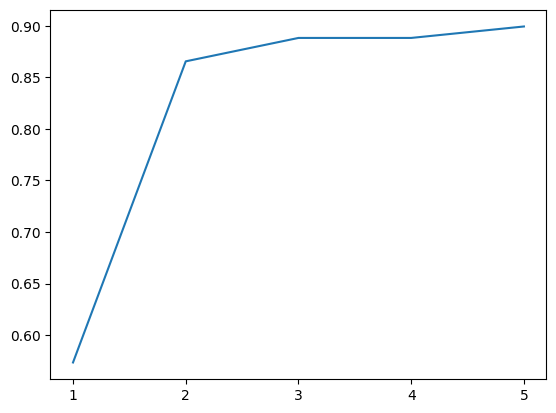

In [12]:
from sklearn.model_selection import KFold
from tqdm import tqdm
import matplotlib.pyplot as plt

# Separate features and target
X = data.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = data['Class']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accs = []

for depth in tqdm(range(1, 6)):
    # List to store the fold accuracies
    fold_accs = []
    
    # Perform the K-Fold cross validation
    for train_index, test_index in kf.split(X):
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the model with the current depth
        model = DecisionTree(max_depth=depth)
        
        # Fit the model
        model.fit2(X_train, y_train)
        
        # Predict on the test set
        predictions = model.predict(X_test)
        
        # Calculate accuracy and append to the list of fold accuracies
        fold_accs.append(accuracy_score(y_test, predictions))
    
    # Calculate the average accuracy across all folds and append to the list of accuracies
    accs.append(sum(fold_accs) / len(fold_accs))
plt.plot(range(1,6), accs)
plt.xticks(range(1,6))
plt.show()

Use that depth and print the test score. Is it better generalizer than the first one? What do you conclude about the tuning proccess using validation? (answer to yourselves).<br>
<font color=red> we can see from the graph that when the depth is 5 we get almost accuary=90 which is more than the previous 88 test accaurcy, and thats due to the cross validation takes into account each data sample (according to its K-fold) and in which learned in class may lead to better test accuarcy which is shown also in the graph.

## Question 4 - PAC, Bias vs Variance
See attached pdf in moodle assignment!

## Question 5 - Polynomial regression - 5 pts bonus
In this problem you will extend regression to fit nonlinear functions.<br/>
The dataset contains one feature (x) and continiuos prediction (y).

In [69]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
#@title Load data

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

In [71]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw3/linreg_data_2d.npy')

x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_test = data_dict['x_test']
y_test = data_dict['y_test']

Look at the plot of the training data. What do you think was the function generated the data? <br/>
<font color='red'>Write your answer here<br><br>
From the observation of the plotted data we can see that the data is distrubuted in a wavy form with 2 peaks.<br>
which indicates that the features X and Y are not correlated.<br>
given 2 peaks we can infer that there are 2 coefficients which mean d=2 propably or given the wavy form the equation may have sinusoidal components also other than the polynomial   </font>

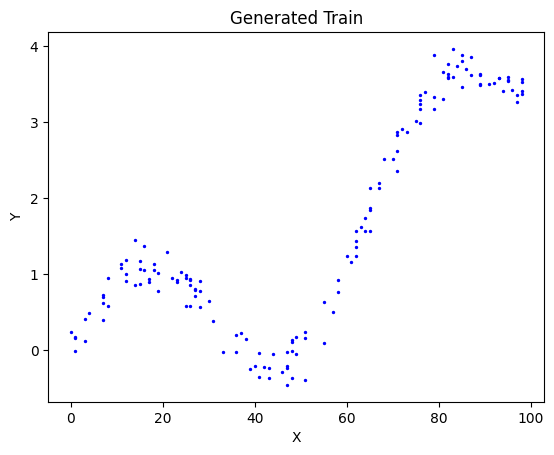

In [72]:
plt.scatter(x_train, y_train, color='blue', s=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

We will assume the polynomial regression problem of the following form:
$$ y=a_0+a_1x+a_2x^2+...+a_dx^d $$
The function ```get_solution``` will find the cofficients, similarly to methods done in simple linear regression. <br/>
The function ```calc``` will recieve a new sample and the cofficients found, and will predict the output.





In [83]:

def get_solution(X, y, degree=2):
    # Ensure X is a 2-dimensional array
    X = X.reshape(-1, 1)
    
    # Generate polynomial features
    X_poly = np.hstack([X**i for i in range(1, degree + 1)])
    
    # Add a column of ones to X_poly for the intercept term
    X_with_intercept = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])
    
    # Compute the transpose of X_with_intercept
    X_transpose = X_with_intercept.T
    
    # Compute the product of X_transpose and X_with_intercept
    X_transpose_X = X_transpose.dot(X_with_intercept)
    
    # Compute the inverse of X_transpose_X
    inverse_X_transpose_X = np.linalg.inv(X_transpose_X)
    
    # Compute the product of X_transpose and y
    X_transpose_y = X_transpose.dot(y)
    
    # Compute the product of the inverse of X_transpose_X and X_transpose_y
    coeff = inverse_X_transpose_X.dot(X_transpose_y)
    
    # Return the coefficients
    return coeff

def calc(x, coefs):
    # Calculate the predicted output using the polynomial coefficients
    y_pred = sum(coef * x**i for i, coef in enumerate(coefs))
    return y_pred

Running the current code with $d=1$ yields a simple regressor.
- Which $d$ works best?<br>
<font color='red'> The d that worked best for the graph as seen in the plot is when d=6,7</font><br>

- According to your previous answer, which $d$ <u>is expected</u> to work the best?<br>
<font color='red'>The best expected d is the one that balance the model bias and variance which should be high enough to capture the complexity of the data but not so high that it overfits the training data. we can see from the plot that when we higher the d we fit the data better until a point it overfits it.</font>
- Try to explain what happens when you try $d+1$ and why? Was the solver you implemented enough?<br>
<font color='red'>When we increase the d we increase the complexity of the model and capture more data, but of corse thats not a good thing when increasing d alot which could potentialy increase the risk of overfitting the data and capturing noises, which lead to lower test accuarcy.




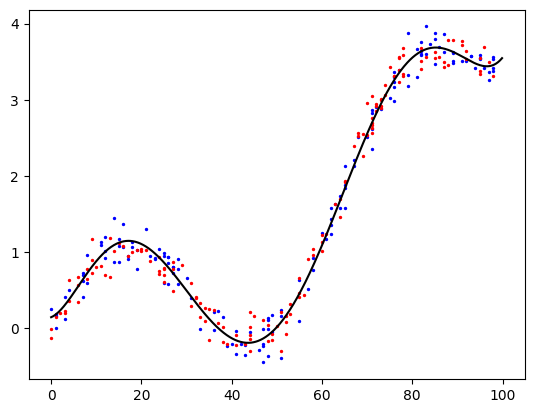

In [88]:
xx = np.arange(0, 100, 0.1)
yy = []



weights = get_solution(x_train, y_train, 7)

for samp in xx:
  yy.append(calc(samp, weights))

plt.scatter(x_train, y_train, color='blue', s=2, label='train')
plt.scatter(x_test, y_test, color='red', s=2, label='test')
plt.plot(xx, yy, color='black')
plt.show()